In [2]:
import tensorflow.keras as keras

In [3]:
mnist = keras.datasets.mnist
print(mnist)

<module 'tensorflow_core.python.keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\mrtru\\Anaconda3\\envs\\tensorflow_gpu\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
import matplotlib.pyplot as plt

In [6]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


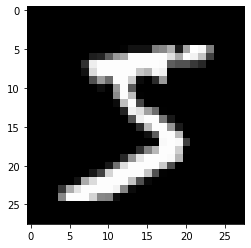

In [7]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


In [9]:
#after observation, x_train seem to be 28x28x(numberOfTestImage) matrix array, y is one dimention array
#first step 1: 28x28x(numberOfTestImage) -> make 28*28x(numberOfTestImage) 
import numpy as np

x_train_c = np.zeros(shape=(len(y_train),28*28))

for i in range(len(y_train)):
    x_train_c[i] = np.reshape(x_train[i],28*28)

print(x_train[0])
print(x_train_c[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
#now we convivert y from matrix[0,numberOfTestImage] to matrix[numberOfTestImage,0]
print(y_train)
y_train_c = np.array([y_train])
y_train_c = y_train_c.T
print(y_train_c)

[5 0 4 ... 5 6 8]
[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [11]:
#initialize weights randomly with mean 0
syn0 = 2*np.random.random((784,1000)) - 1
syn1 = 2*np.random.random((1000,1)) - 1

print(syn0)
print(syn1)

[[-0.62658027 -0.87482404 -0.78924569 ...  0.62673857  0.68228354
   0.80954294]
 [-0.44448735 -0.02042178 -0.5429109  ... -0.2440102   0.68222868
   0.29944922]
 [-0.4270004  -0.05123626 -0.84764796 ...  0.94040471 -0.42569999
   0.75090274]
 ...
 [ 0.91006096  0.26480353  0.09581438 ...  0.10725846  0.09827609
  -0.10376952]
 [-0.25037482 -0.53506042  0.61395122 ... -0.82653832 -0.10852603
   0.84152806]
 [-0.89345708 -0.38847824  0.03837692 ...  0.92750217 -0.35314671
   0.03386946]]
[[ 0.39876751]
 [ 0.45108062]
 [ 0.05549871]
 [ 0.17791228]
 [-0.52521958]
 [ 0.57105571]
 [ 0.98085586]
 [-0.50445089]
 [-0.32003027]
 [ 0.73839272]
 [-0.81804609]
 [ 0.83598882]
 [ 0.54475531]
 [ 0.98340608]
 [ 0.78193978]
 [ 0.90804168]
 [-0.18301425]
 [-0.72405659]
 [ 0.29700881]
 [-0.39783272]
 [ 0.55104355]
 [-0.14566288]
 [-0.1988967 ]
 [-0.29901667]
 [ 0.98776972]
 [-0.63743949]
 [-0.17270027]
 [ 0.47448557]
 [-0.35519908]
 [-0.95356591]
 [-0.72598949]
 [ 0.97603538]
 [ 0.01530003]
 [ 0.4002104 

In [12]:
#sigmoid function
def nonlin(x, deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1 + np.exp(-x))

In [13]:
a = np.array([1,2,4])
print(a)
b = np.array([[1,2,3,4],
              [5,6,7,8],
              [1,2,3,4]])
print(b)
c = a.dot(b)
print(c)

[1 2 4]
[[1 2 3 4]
 [5 6 7 8]
 [1 2 3 4]]
[15 22 29 36]


In [17]:
#now train the dataset for 10000 time
for iter in range(10000):
    l0 = x_train_c
    #l1 = nonlin(np.dot(l0, syn0))
    #l2 = nonlin(np.dot(l1, syn1))
    
    #l2_error = y_train - l2
    
    if(iter%1000 == 0):
        print("count")
        #print("error : {0}".format(str(np.mean(np.abs(l2_error)))))

count
count
count
count
count
count
count
count
count
count
